### [ Fish 깊이에 따른 무게 예측 ]
-	데이터셋 : fish.csv
-	피쳐 : 길이 Length
-	타겟 : 무게 Wegiht
-	학습방법 : 지도학습 - 회귀
-	알고리즘 : LinearRegression

[1] 모듈 로딩 

In [376]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # 선형회귀
# 오차 계산
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error

In [377]:
data = '../Data/fish.csv'

In [378]:
# 데이터 로딩
# 농어 생선의 무게 와 길이
# skipfooter , skiprows , usecols
fish_df =  pd.read_csv(data, skiprows=73, header=None, skipfooter=31, engine='python', usecols=[1,2])

[2] 탐색적 분석

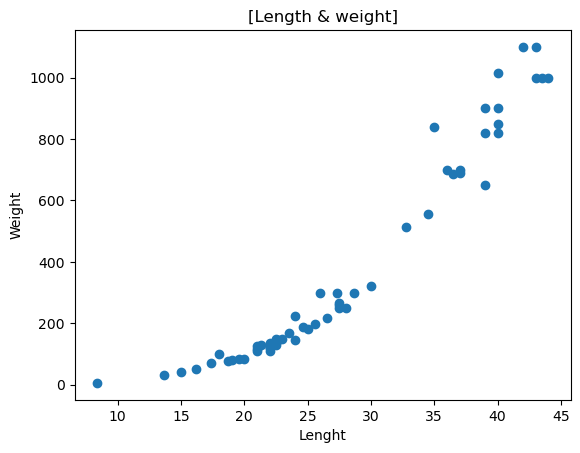

In [379]:
# 시각화
# 1번 컬럼 => Weight, 2번 컬럼 => Length
plt.plot(fish_df[2],fish_df[1],'o')
plt.xlabel('Lenght')
plt.ylabel('Weight')
plt.title('[Length & weight]')
plt.show()

[3] 데이터 셋 준비
*	피쳐와 타겟 분리 (학습용/검증용/테스트용) 데이터셋 분리

In [380]:
# [3-1] 피쳐와 타겟 분리
feature_df = fish_df[fish_df.columns[-1:]]
target_df = fish_df[fish_df.columns[0]]

print(f'feature_df => {feature_df.ndim}D, ftarget_df,  {target_df.ndim}D')

feature_df => 2D, ftarget_df,  1D


In [381]:
X_train, X_test , y_train, y_test = train_test_split(feature_df, target_df,test_size=0.2 , random_state=15)

In [382]:
trainDs = (X_train, y_train)  
testDs = (X_test, y_test)

# trainDs = (X_train, y_train)  
# testDs = (X_test, y_test)



lr = LinearRegression()

lr.fit(X_train, y_train)  

LinearRegression()

In [383]:
print(testDs)

(       2
41  36.5
16  22.0
22  22.7
24  23.5
14  21.3
20  22.5
36  28.7
51  40.0
55  43.5
30  26.5
38  32.8
49  40.0, 41     685.0
16     120.0
22     145.0
24     170.0
14     130.0
20     130.0
36     300.0
51     820.0
55    1000.0
30     218.0
38     514.0
49     900.0
Name: 1, dtype: float64)


In [384]:
# 결정된 파라미터 확인
print(f'가중치:{lr.coef_} 절편: {lr.intercept_}')

가중치:[36.42447503] 절편: -625.685674205166


In [385]:
# 평가

train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print(f'훈련점수:{train_score}, 테스트 점수:{test_score}')

훈련점수:0.9086157877970404, 테스트 점수:0.9575033871385509


In [386]:
# 학습용, 테스트용 DS 에 대한 모델 적합도, 비용 계산
def checkModel(trainDs, testDs, model):
	result= [] 	# 성능평가 결과 저장
	#print(trainDs, testDs)
	for data, label in [trainDs, testDs]:
		# -모델 즉, 수식에 데이터 적용해서 예측값
		pre_label = model.predict(data)
		# - 모델 적합도 : 높을수록 좋음(1,0)     
		score = model.score(data,label)
		# - 오차 계산 : 낮을수록 좋음(0.0)
		rmse = root_mean_squared_error(label, pre_label)
		mse = mean_squared_error(label, pre_label)
		mae = mean_absolute_error(label, pre_label) 
		# - 데이터셋 별 성능 결과 저장
		result.append([score,rmse,mse,mae])
	
	return pd.DataFrame(result)

In [387]:
result = checkModel(trainDs,testDs, lr)

print(type(result[0]))

<class 'pandas.core.series.Series'>


In [388]:
result

,0,1,2,3
0,0.908616,104.356515,10890.282298,81.532178
1,0.957503,66.711344,4450.403481,57.703191


In [389]:
#resultDf = pd.DataFrame(data=result, columns=['score','rmse','mse','mae'], index=['Train','Test'])
resultDf = pd.DataFrame(data=result)
resultDf.index , resultDf.columns 

(RangeIndex(start=0, stop=2, step=1), RangeIndex(start=0, stop=4, step=1))

In [390]:
resultDf.columns= ['score','rmse','mse','mae']

In [391]:
resultDf

,score,rmse,mse,mae
0,0.908616,104.356515,10890.282298,81.532178
1,0.957503,66.711344,4450.403481,57.703191


In [392]:
resultDf.index = ['Train','Test']

In [393]:
resultDf

,score,rmse,mse,mae
Train,0.908616,104.356515,10890.282298,81.532178
Test,0.957503,66.711344,4450.403481,57.703191


In [394]:
# 훈련용과 테스트용 성능차이 행 추가
resultDf.loc['diff'] = (resultDf.loc['Train'] - resultDf.loc['Test'] ).abs()
resultDf

,score,rmse,mse,mae
Train,0.908616,104.356515,10890.282298,81.532178
Test,0.957503,66.711344,4450.403481,57.703191
diff,0.048888,37.645171,6439.878817,23.828987


# [학습 결과 분석]
* 모델 적합도 : Train > Test : 과대적합
* 비용 계산 : Train < Test : 과대적합

- [해결방안]
* 과도한 반복 학습 => scikit-learn 에서는 개발자 제어불가 X
* 모델 복잡한가? => 데이터 충분하지않음
* 해당 알고리즘의 결과물 분석 => 선형식 과 데이터의 관계 => 완벽한 선형이 아님, 오히려 곡선

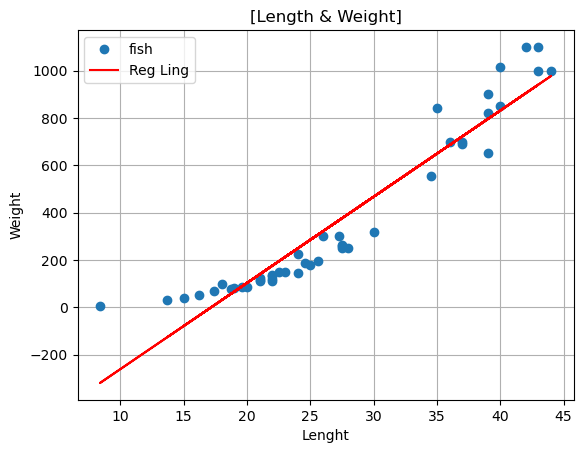

In [395]:
# 데이터 시각확 
plt.plot(X_train, y_train, 'o', label= 'fish')

# 선형회귀에서 구한 
plt.plot(X_train, lr.predict(X_train),'r-', label = 'Reg Ling')
plt.xlabel('Lenght')
plt.ylabel('Weight')
plt.title('[Length & Weight]')
plt.legend()
plt.grid()
plt.show()